# Data Set: USA Cars

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 11,5
import seaborn as sns

#### Данные о продаже поддержанных автомобилей в США с сайта auctionexport.com

In [22]:
df = pd.read_csv('USA_cars_datasets.csv')
USA_cars = df[['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color', 'state', 'country']]
USA_cars

,price,brand,model,year,title_status,mileage,color,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa
...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,california,usa
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,florida,usa
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,florida,usa
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,florida,usa


In [23]:
USA_cars.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


In [24]:
USA_cars.price.sum()

46900411

In [25]:
def old_age_status(year):
    if year > 2015:
        return 'young'
    elif year > 2010:
        return 'middle-aged'
    else:
        return 'old'    
USA_cars['old_age_status'] = USA_cars['year'].apply(old_age_status)

def mileage_status(mileage):
    if mileage < 50000:
        return 'low_mileage'
    elif mileage < 150000:
        return 'avarage_mileage'
    else:
        return 'high_mileage'    
USA_cars['mileage_status'] = USA_cars['mileage'].apply(mileage_status)

USA_cars

<ipython-input-25-9b0e88e22189>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_cars['old_age_status'] = USA_cars['year'].apply(old_age_status)
<ipython-input-25-9b0e88e22189>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_cars['mileage_status'] = USA_cars['mileage'].apply(mileage_status)


,price,brand,model,year,title_status,mileage,color,state,country,old_age_status,mileage_status
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,old,high_mileage
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,middle-aged,high_mileage
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,young,low_mileage
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,middle-aged,avarage_mileage
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,young,low_mileage
...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,california,usa,young,low_mileage
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,florida,usa,young,low_mileage
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,florida,usa,young,low_mileage
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,florida,usa,young,low_mileage


<AxesSubplot:title={'center':'price'}>

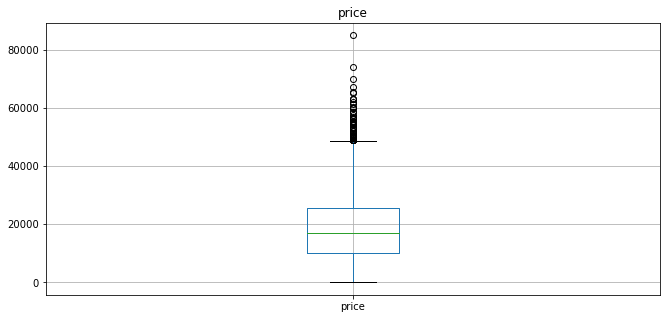

In [26]:
USA_cars[['price']].plot(kind='box',
                             title='price', grid=True)

<AxesSubplot:title={'center':'Correlation between price and year'}, xlabel='year', ylabel='price'>

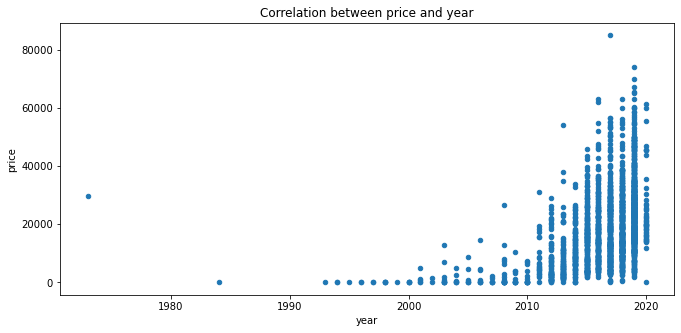

In [27]:
USA_cars.plot(kind='scatter', 
        x='year', 
        y='price', 
        title='Correlation between price and year')

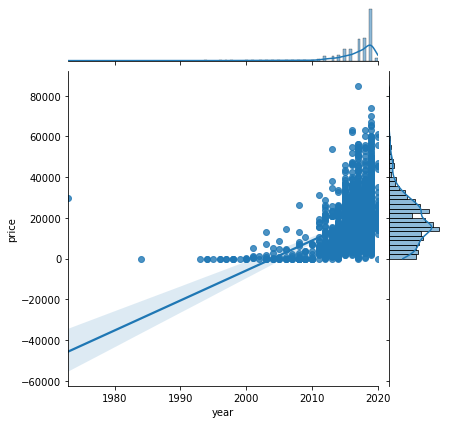

In [28]:
sns.jointplot(x='year', y='price', data=USA_cars, kind='reg')

<AxesSubplot:xlabel='brand', ylabel='price'>

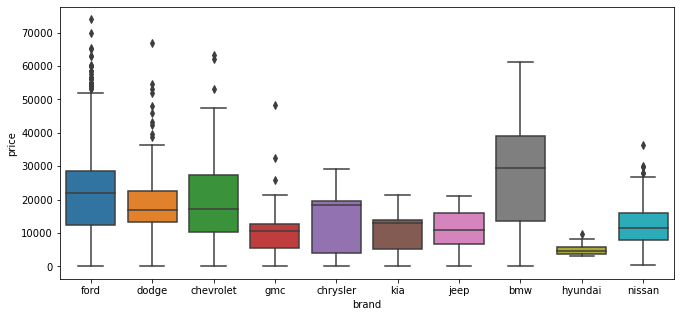

In [29]:
top_brands = USA_cars['brand'].value_counts().sort_values(ascending=False).head(10).index.values
# top_platforms
sns.boxplot(x="brand", y="price", 
            data=USA_cars[USA_cars.brand.isin(top_brands)])

In [30]:
brand_year_price = USA_cars[USA_cars['brand'].isin(top_brands)].pivot_table(
                        index='brand', 
                        columns='year', 
                        values='price', 
                        aggfunc=sum).fillna(0)

brand_year_price

year,1973,1984,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
brand,,,,,,,,,,,,,,,,,,,,,
bmw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6200.0,0.0,2925.0,28500.0,0.0,147700.0,200400.0,0.0,0.0,61200.0
chevrolet,29800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62825.0,9100.0,85000.0,102125.0,384750.0,1039580.0,1202056.0,932800.0,1341200.0,313925.0
chrysler,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175.0,...,3450.0,0.0,0.0,0.0,7350.0,0.0,77330.0,6440.0,124200.0,23000.0
dodge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33800.0,158950.0,90700.0,389032.0,314720.0,261350.0,613430.0,955560.0,4806132.0,15900.0
ford,0.0,25.0,0.0,25.0,0.0,0.0,0.0,25.0,0.0,0.0,...,68679.0,328943.0,551000.0,652330.0,2045460.0,1860101.0,3610911.0,3746729.0,13349839.0,460500.0
gmc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19330.0,10790.0,0.0,0.0,0.0,0.0,284210.0,54400.0,74500.0,0.0
hyundai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3460.0,0.0,5998.0,11250.0,0.0,18000.0,0.0,39340.0,0.0
jeep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,...,0.0,0.0,0.0,11920.0,0.0,0.0,0.0,0.0,315870.0,0.0
kia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3000.0,0.0,0.0,3810.0,91100.0,12500.0,12700.0,21500.0


<AxesSubplot:xlabel='year', ylabel='brand'>

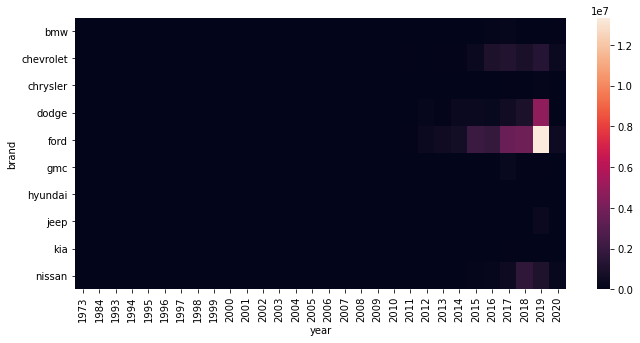

In [31]:
sns.heatmap(brand_year_price)

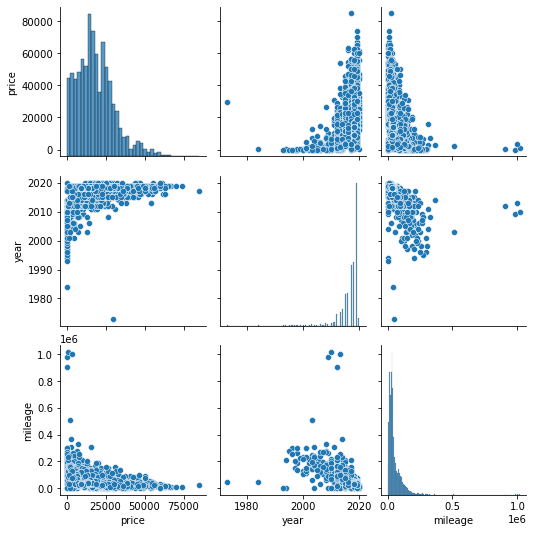

In [32]:
sns.pairplot(USA_cars[['price', 'year', 'mileage']])

In [26]:
USA_cars.old_age_status.value_counts()

young          1915
middle-aged     481
old             103
Name: old_age_status, dtype: int64

In [27]:
USA_cars.mileage_status.value_counts()

low_mileage        1711
avarage_mileage     677
high_mileage        111
Name: mileage_status, dtype: int64

In [42]:
USA_cars_1 = USA_cars[[x for x in USA_cars.columns if 'price' in x] + ['year']] \
    .groupby('year').sum()
USA_cars_1

,price
year,
1973,29800
1984,25
1993,0
1994,25
1995,0
1996,0
1997,0
1998,25
1999,25


Text(0, 0.5, 'Продажи, млн. USD')

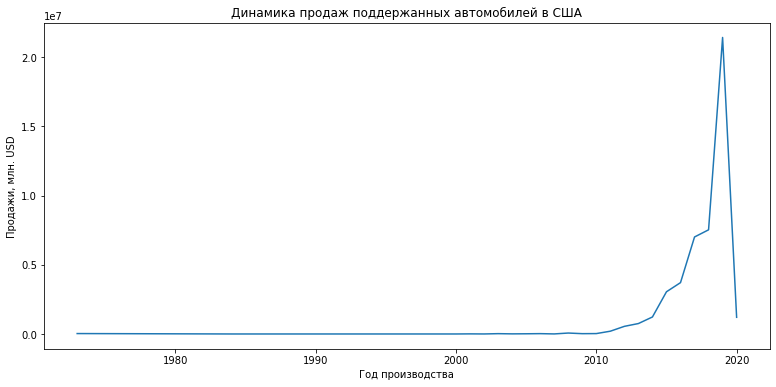

In [43]:
plt.plot(USA_cars_1.index, USA_cars_1.price)
plt.title('Динамика продаж поддержанных автомобилей в США')
plt.xlabel('Год производства')
plt.ylabel('Продажи, млн. USD')

In [44]:
USA_cars_2 = USA_cars[[x for x in USA_cars.columns if 'price' in x] + ['mileage']] \
    .groupby('mileage').sum()
USA_cars_2

,price
mileage,
0.0,4950
1.0,82105
7.0,25200
71.0,59975
122.0,26500
...,...
507985.0,2000
902041.0,475
982486.0,0


Text(0, 0.5, 'Продажи, млн. USD')

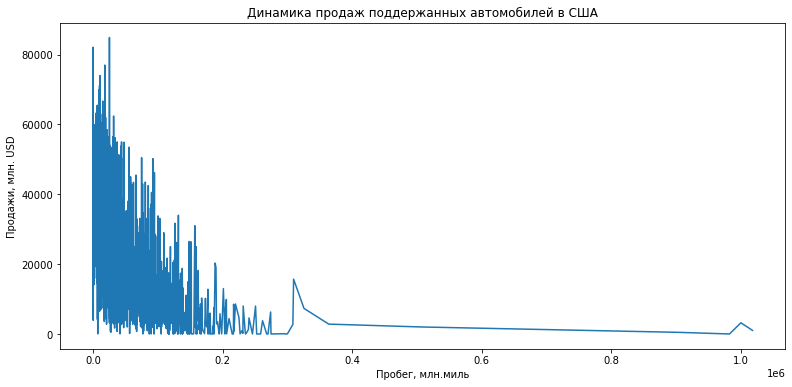

In [47]:
plt.plot(USA_cars_2.index, USA_cars_2.price)
plt.title('Динамика продаж поддержанных автомобилей в США')
plt.xlabel('Пробег, млн.миль')
plt.ylabel('Продажи, млн. USD')